In [3]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [4]:
from keras.datasets import mnist
objects= mnist
(train_img,train_lab),(test_img,test_lab)= objects.load_data()

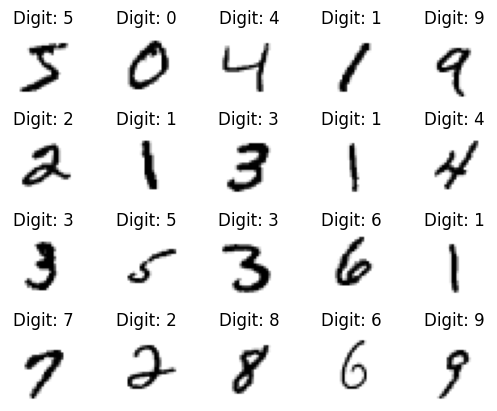

In [5]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_img[i],cmap='gray_r')
    plt.title("Digit: {}".format(train_lab[i])) 
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')

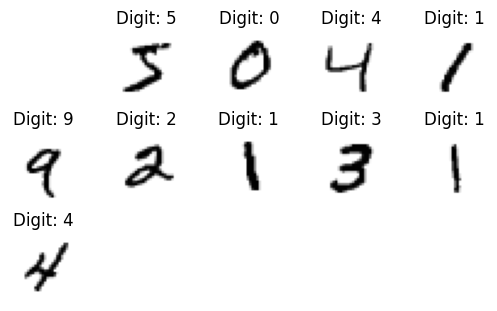

In [6]:
for i in range(10):
    plt.subplot(4,5,i+2)
    plt.imshow(train_img[i],cmap='gray_r')
    plt.title("Digit: {}".format(train_lab[i])) 
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')

In [7]:
print('Training images shape: ',train_img.shape)
print ('Testing images shape: ',test_img.shape)

Training images shape:  (60000, 28, 28)
Testing images shape:  (10000, 28, 28)


Text(0.5, 0, 'Intensity')

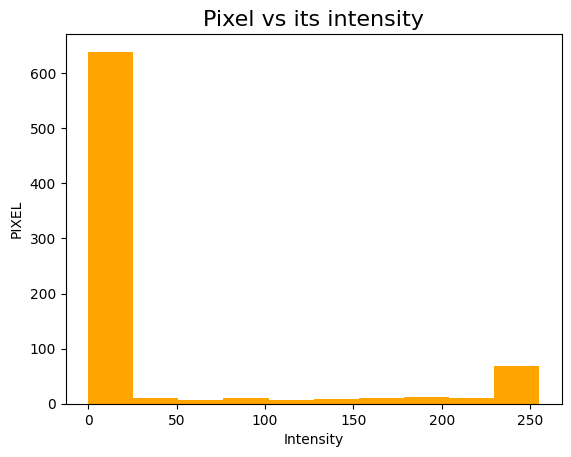

In [8]:
plt.hist(train_img[0].reshape(784), facecolor='orange') 
plt.title('Pixel vs its intensity', fontsize=16)

plt.ylabel('PIXEL')

plt.xlabel('Intensity')

In [9]:
train_img=train_img/255.0

test_img=test_img/255.0

Text(0.5, 0, 'Intensity')

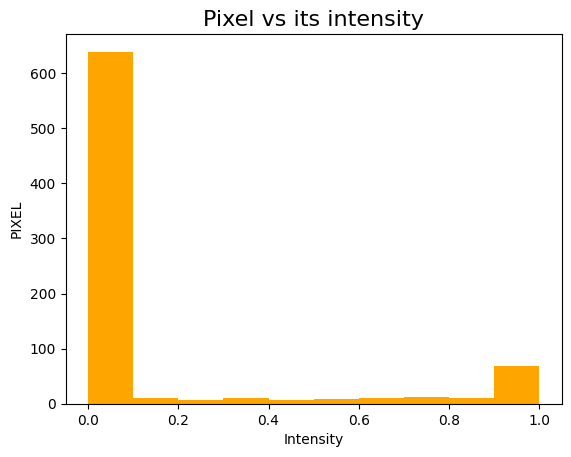

In [10]:
plt.hist(train_img[0].reshape(784), facecolor='orange')

plt.title('Pixel vs its intensity',fontsize=16)

plt.ylabel('PIXEL')

plt.xlabel('Intensity')

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model=Sequential() 
input_layer= Flatten(input_shape=(28,28)) 
model.add(input_layer) 
hidden_layer1=Dense(512,activation='relu') 
model.add(hidden_layer1) 
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2) 
output_layer=Dense(10,activation='softmax') 
model.add(output_layer)

e:\Apps\Python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#compiling the sequential model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(train_img,train_lab,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9053 - loss: 0.3125
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9751 - loss: 0.0795
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0527
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9887 - loss: 0.0364
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9899 - loss: 0.0315
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9927 - loss: 0.0222
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9922 - loss: 0.0258
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0199
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9950 - loss: 0.0153
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0174


In [14]:
model.save('DR.h5')

In [15]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2) 
print("Test Loss", loss_and_acc[0])

print("Test Accuracy", loss_and_acc[1])

313/313 - 1s - 2ms/step - accuracy: 0.9782 - loss: 0.0965
Test Loss 0.09647928178310394
Test Accuracy 0.9782000184059143


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted Value:  7
Successful prediction


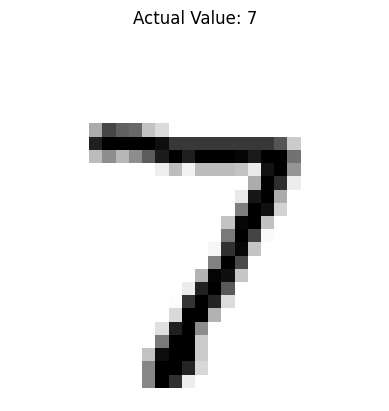

In [16]:
plt.imshow(test_img[0],cmap='gray_r')

plt.title('Actual Value: {}'.format(test_lab[0]))

prediction=model.predict(test_img)

plt.axis('off')

print('Predicted Value: ',np.argmax(prediction[0]))

if(test_lab[0]==(np.argmax(prediction[0]))):
    print('Successful prediction') 
else:
    print('Unsuccessful prediction')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted Value:  7
Successful prediction


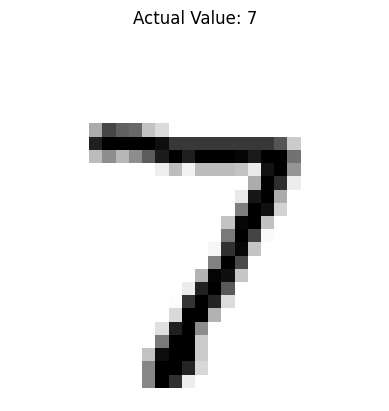

In [17]:
plt.imshow(test_img[0],cmap='gray_r')

plt.title('Actual Value: {}'.format(test_lab[0]))

prediction=model.predict(test_img)

plt.axis('off')

print('Predicted Value: ',np.argmax(prediction[0]))

if(test_lab[0]==(np.argmax(prediction[0]))):
    print('Successful prediction') 
else:
    print('Unsuccessful prediction')